# The $k$-Nearest Neighbors Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Parametric%20Modeling/Lecture%203%20Single%20Neuron%20Logistic%20Regression/Logistic_Regression.ipynb)


In [13]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# import the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 

# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features.values
y = rice_cammeo_and_osmancik.data.targets.values

In [14]:
df_var=rice_cammeo_and_osmancik.variables
var_name=df_var['name']

In [15]:
# Standardize the value of X
X=np.array([X[:,i]/X[:,i].max() for i in range(X.shape[1])]).T
# concatenate X and y
data = np.concatenate((X,y),axis=1)
# generate the Dataframe
df=pd.DataFrame(data,columns=var_name)


In [24]:
X=df[['Perimeter', 'Major_Axis_Length']].to_numpy()
y=df['Class'].to_numpy()

train_X, test_X, train_y, test_y=train_test_split(X, y, test_size=0.33, random_state=1)

In [25]:
print(f"The shape of X is {X.shape} \n")
print(f"The shape of y is {y.shape}")

The shape of X is (3810, 2) 

The shape of y is (3810,)


In [18]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 0.03050701134084289


In [21]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [27]:
k_nearest_neighbors(test_X[0], train_X, train_y, 5)

[[array([0.697857237969648, 0.6447251726993181], dtype=object),
  'Osmancik',
  0.0036402320026447162],
 [array([0.7053037596324717, 0.6507015034963024], dtype=object),
  'Osmancik',
  0.007169905641482102],
 [array([0.6906623372577494, 0.650053959136138], dtype=object),
  'Osmancik',
  0.008078811242479698],
 [array([0.7074060352144735, 0.6464608956214132], dtype=object),
  'Osmancik',
  0.009046506445966029],
 [array([0.6926825940059546, 0.639599210826296], dtype=object),
  'Osmancik',
  0.010492676201029697]]

In [28]:
test_y[0]

'Osmancik'

In [29]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [31]:
# Test our function 
print(f"Predicted value is {KNN_Predict(test_X[20], train_X, train_y, 5)} \n")
print(f"Real value is {test_y[20]}")

Predicted value is Osmancik 

Real value is Osmancik


In [32]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [33]:
classification_error(test_X, test_y, train_X, train_y, 5)

0.08108108108108109

# Choose the optimal value of $K$

In [35]:
possible_K_values=[i for i in range(3,30,2)]
classification_errors=[classification_error(test_X, test_y, train_X, train_y, i) for i in possible_K_values]

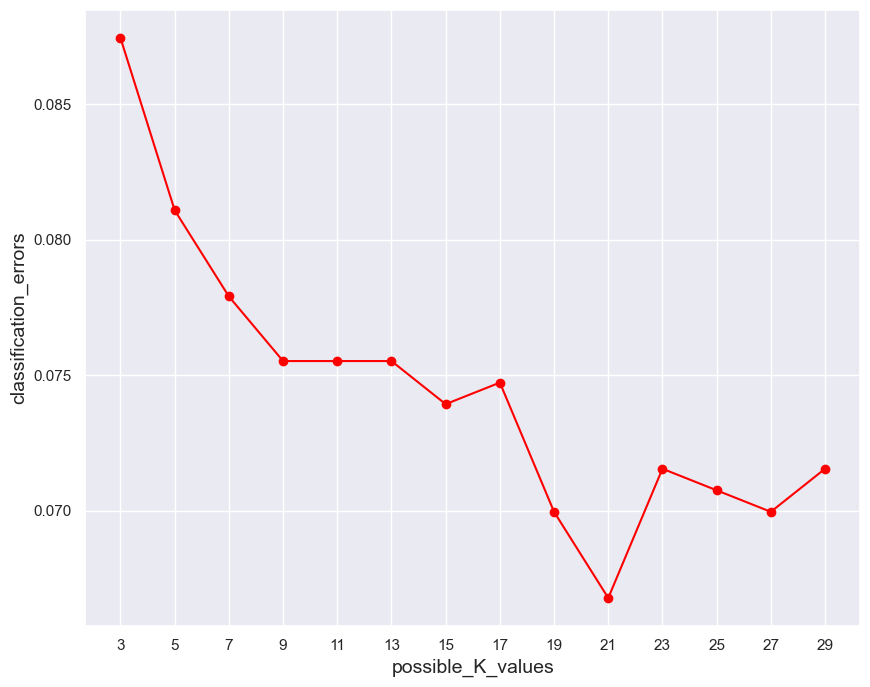

In [39]:
plt.figure(figsize=(10,8))
plt.plot(possible_K_values, classification_errors, color='red', marker='o')
plt.xlabel('possible_K_values', fontsize=14)
plt.ylabel('classification_errors', fontsize=14)
plt.xticks(possible_K_values)
plt.show()

In [ ]:
# Use the optimal K value equal to 21
